In [227]:
## Specify the prior distribution

m <- 300  # Prior mean
v <- 900 # Prior variance

alpha <- m^2/v + 2
beta <- m^3/v+m

[1] "I think the average time between 2 earthquakes is 300 days according to my experience and limited knowledge about earthquakes, and the standard deviation may be a month. These prior knowledge can be observed from the prior plot "


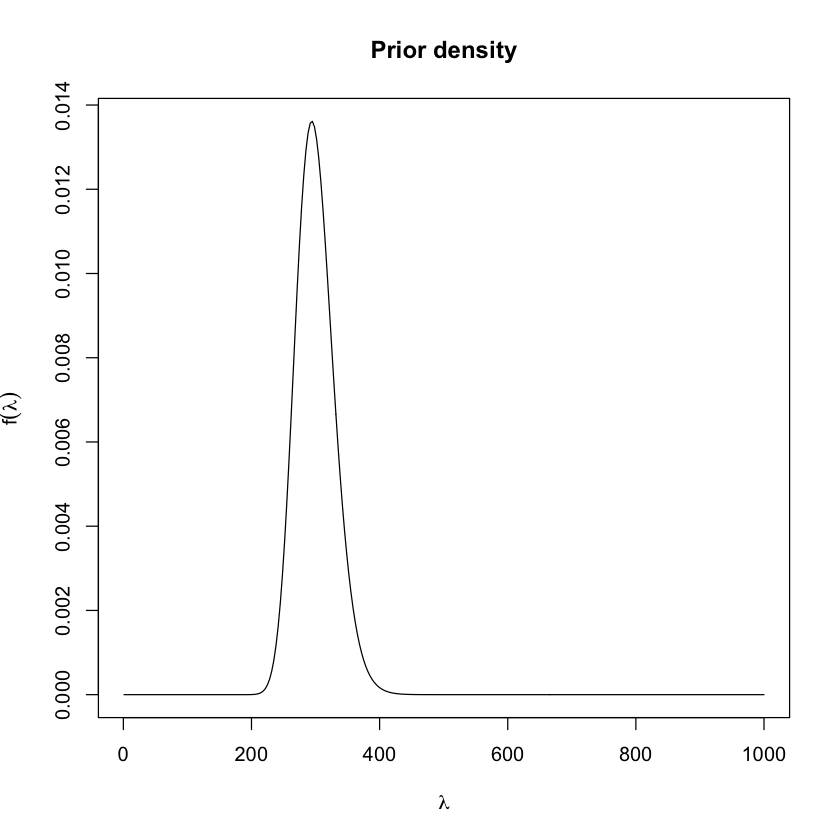

In [228]:
## Plot the prior density
library(MCMCpack)

x <- seq(1, 1000, length = 300)
prior <- dinvgamma(x, shape = alpha, scale = beta) # the prior pdf
plot(x, prior, type = "l", xlab = expression(lambda),
     ylab = expression(f(lambda)), main = "Prior density")
print("I think the average time between 2 earthquakes is 300 days according to my experience and limited knowledge about earthquakes, and the standard deviation may be a month. These prior knowledge can be observed from the prior plot ")

In [229]:
## The data

load("/Users/yao/Desktop/stat201b/HW/HW4/BerkeleyEarthquakes.RData")
#head(earthquakes)
data <- earthquakes$Lag[-1]
n <- length(data)

In [230]:
## Update the parameters to get the posterior distribution

alpha.star <- n + alpha
beta.star <- sum(data) + beta
posterior <- dinvgamma(x, shape = alpha.star,
                   scale = beta.star)
m.star = beta.star/(alpha.star-1)
v.star = beta.star^2/(alpha.star-1)^2/(alpha.star-2)
print(m)
print(v)
print(m.star)
print(v.star)

[1] 300
[1] 900
[1] 267.8131
[1] 432.0715


[1] "After seeing the data, the mean becomes closer to the sample mean, variance becomes smaller, which means I am more confident about lambda after seeing the data."


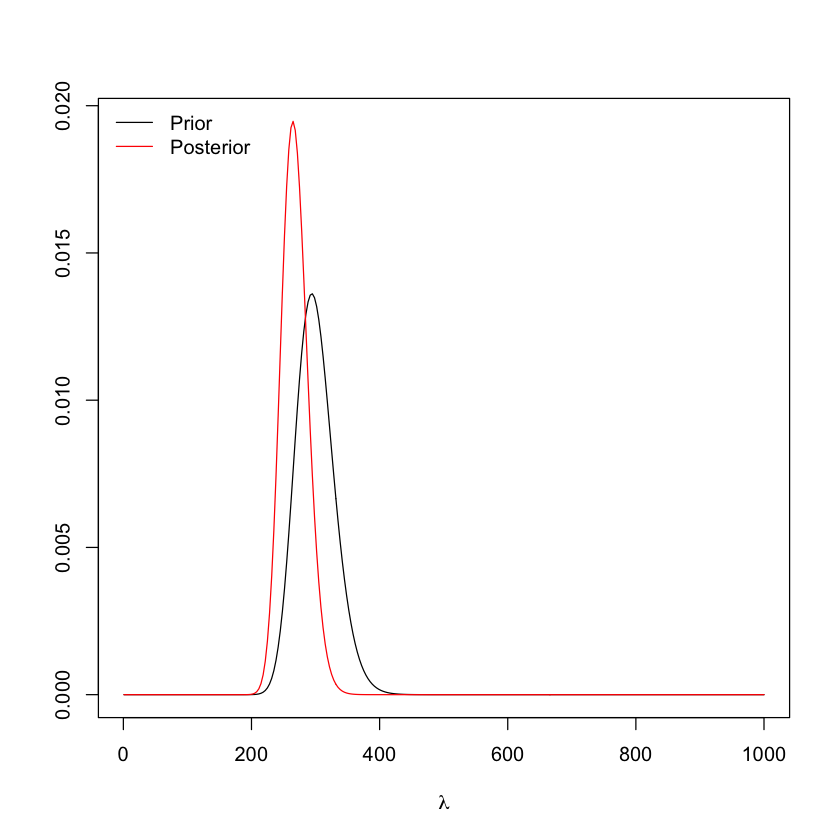

In [231]:
## Plot the prior and posterior densities

plot(x, prior, type = "l", xlab = expression(lambda), ylab = "", ylim=range(c(prior, posterior)))

lines(x, posterior, col = 2)

legend("topleft", lty = rep(1, 2), col = 1:2,
       legend = c("Prior", "Posterior"), bty = "n")

print("After seeing the data, the mean becomes closer to the sample mean, variance becomes smaller, which means I am more confident about lambda after seeing the data.")


In [232]:
mean(data)

[1] 218.5574